<a href="https://colab.research.google.com/github/anantha28/COVID_ICU_Admission/blob/main/18360_Group11_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [ ]:
data.shape

(1925, 231)

In [ ]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

In [ ]:
#Changing the categorical column  Age percentile to a series of integers in order to show their ordering.
from sklearn.preprocessing import OrdinalEncoder
data['AGE_PERCENTIL'] = OrdinalEncoder().fit_transform(data[['AGE_PERCENTIL']])
data['AGE_PERCENTIL'].value_counts()

1.0    215
2.0    205
0.0    205
3.0    200
6.0    195
7.0    190
4.0    190
9.0    185
5.0    185
8.0    155
Name: AGE_PERCENTIL, dtype: int64

In [ ]:
#features contain Mean,Median for each category,so sepearting them out
df_mean = data.filter(regex="\w+_MEAN")
df_median = data.filter(regex="\w+_MEDIAN")
raw_columns = list(map(lambda col: col.split('_MEAN')[0], df_mean.columns))
raw_columns

['ALBUMIN',
 'BE_ARTERIAL',
 'BE_VENOUS',
 'BIC_ARTERIAL',
 'BIC_VENOUS',
 'BILLIRUBIN',
 'BLAST',
 'CALCIUM',
 'CREATININ',
 'FFA',
 'GGT',
 'GLUCOSE',
 'HEMATOCRITE',
 'HEMOGLOBIN',
 'INR',
 'LACTATE',
 'LEUKOCYTES',
 'LINFOCITOS',
 'NEUTROPHILES',
 'P02_ARTERIAL',
 'P02_VENOUS',
 'PC02_ARTERIAL',
 'PC02_VENOUS',
 'PCR',
 'PH_ARTERIAL',
 'PH_VENOUS',
 'PLATELETS',
 'POTASSIUM',
 'SAT02_ARTERIAL',
 'SAT02_VENOUS',
 'SODIUM',
 'TGO',
 'TGP',
 'TTPA',
 'UREA',
 'DIMER',
 'BLOODPRESSURE_DIASTOLIC',
 'BLOODPRESSURE_SISTOLIC',
 'HEART_RATE',
 'RESPIRATORY_RATE',
 'TEMPERATURE',
 'OXYGEN_SATURATION']

In [ ]:
#Feature Extraction.
#Selecting all the unique column
#Selecting all the Columns which contains Mean Values
# As the no of columns is 231 we need to filter out columns which we dont need.
uniq_cols = ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED']
special_cols = ['WINDOW', 'ICU']

df = data[uniq_cols + list(df_mean.columns) + special_cols]
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,0
1,0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,2-4,0
2,0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,6-12,0
4,0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,ABOVE_12,1


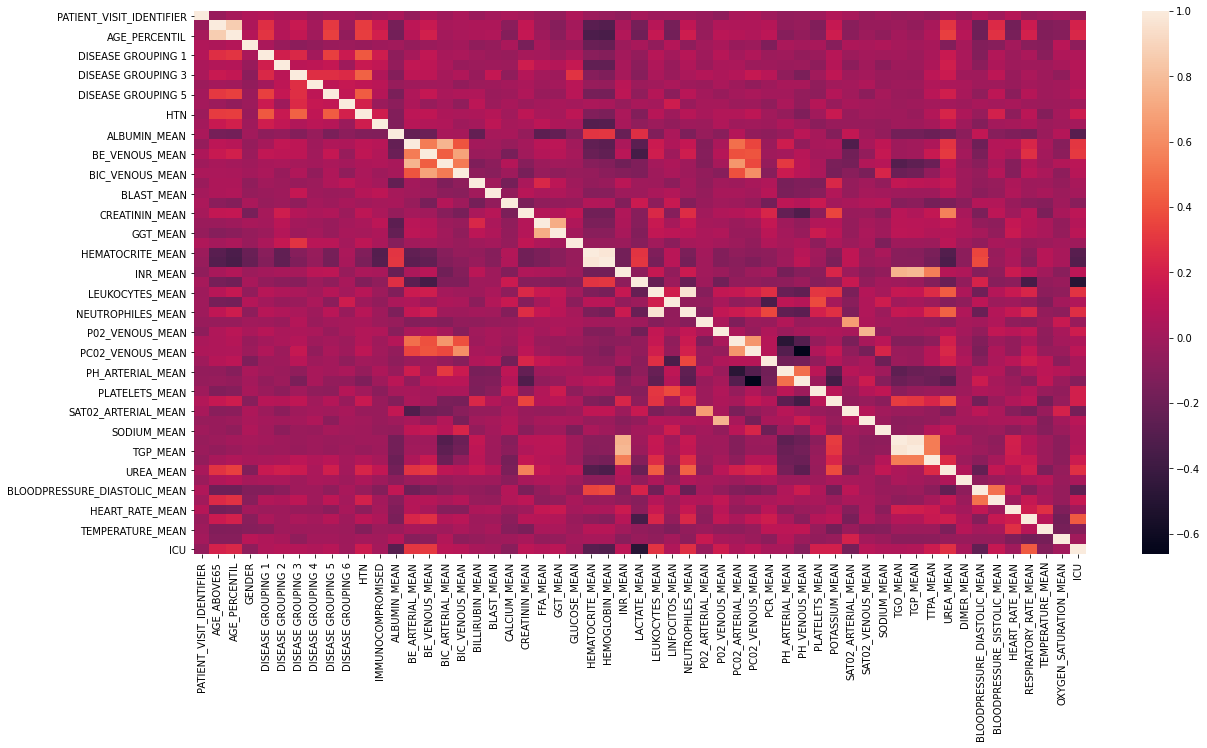

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [ ]:
df.shape

(1925, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER      1925 non-null   int64  
 1   AGE_ABOVE65                   1925 non-null   int64  
 2   AGE_PERCENTIL                 1925 non-null   float64
 3   GENDER                        1925 non-null   int64  
 4   DISEASE GROUPING 1            1920 non-null   float64
 5   DISEASE GROUPING 2            1920 non-null   float64
 6   DISEASE GROUPING 3            1920 non-null   float64
 7   DISEASE GROUPING 4            1920 non-null   float64
 8   DISEASE GROUPING 5            1920 non-null   float64
 9   DISEASE GROUPING 6            1920 non-null   float64
 10  HTN                           1920 non-null   float64
 11  IMMUNOCOMPROMISED             1920 non-null   float64
 12  ALBUMIN_MEAN                  821 non-null    float64
 13  BE_

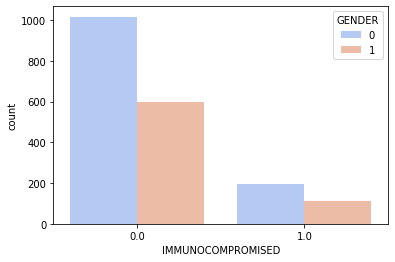

In [ ]:
sns.countplot(x="IMMUNOCOMPROMISED",hue="GENDER",data=df,palette="coolwarm")

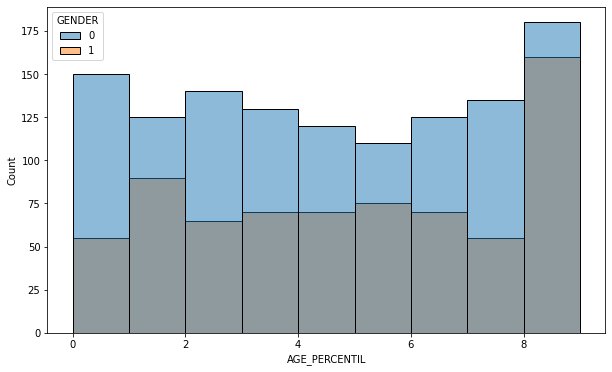

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="AGE_PERCENTIL",hue="GENDER",binwidth=1)
plt.show()

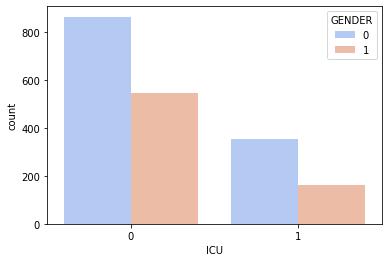

In [ ]:
sns.countplot(x="ICU",hue="GENDER",data=df,palette="coolwarm")

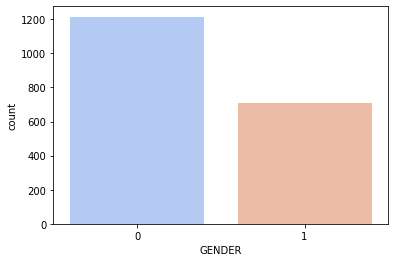

In [ ]:
sns.countplot(x="GENDER",data=df,palette="coolwarm")

## We can assume that a patient who does not have a measurement recorded in a time window is clinically stable.Hence, we can fill the missing values using the next or previous entry.


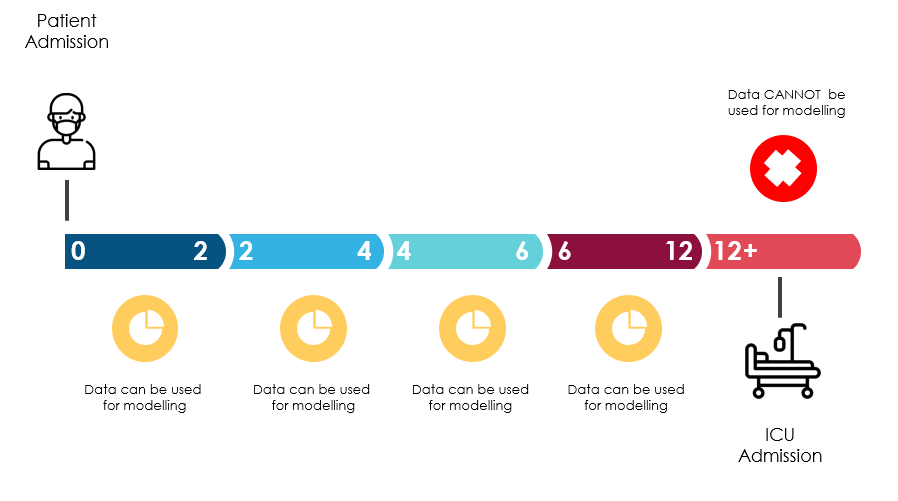

In [ ]:
#Filling the missing values
#grouping the dataset based on the ICU Admission window
#then using the ffill we can fill missing values based on the forward fill of the first value till the NaN value is encountered 
#and goes until another non null is encountered.  
df= df.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
    .fillna(method='ffill')\
    .fillna(method='bfill')

In [ ]:
#checking for constant columns so that we can remove it.
const_columns = list(df.columns[df.nunique() <= 1])
const_columns

[]

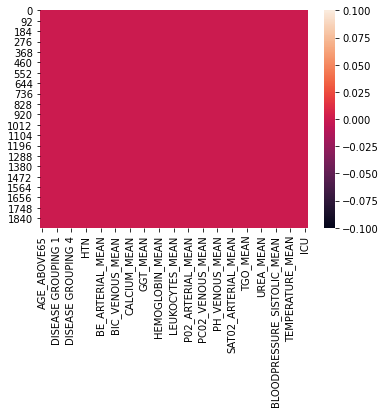

In [ ]:
#No null values(heatmap for null values)
sns.heatmap(df.isnull())

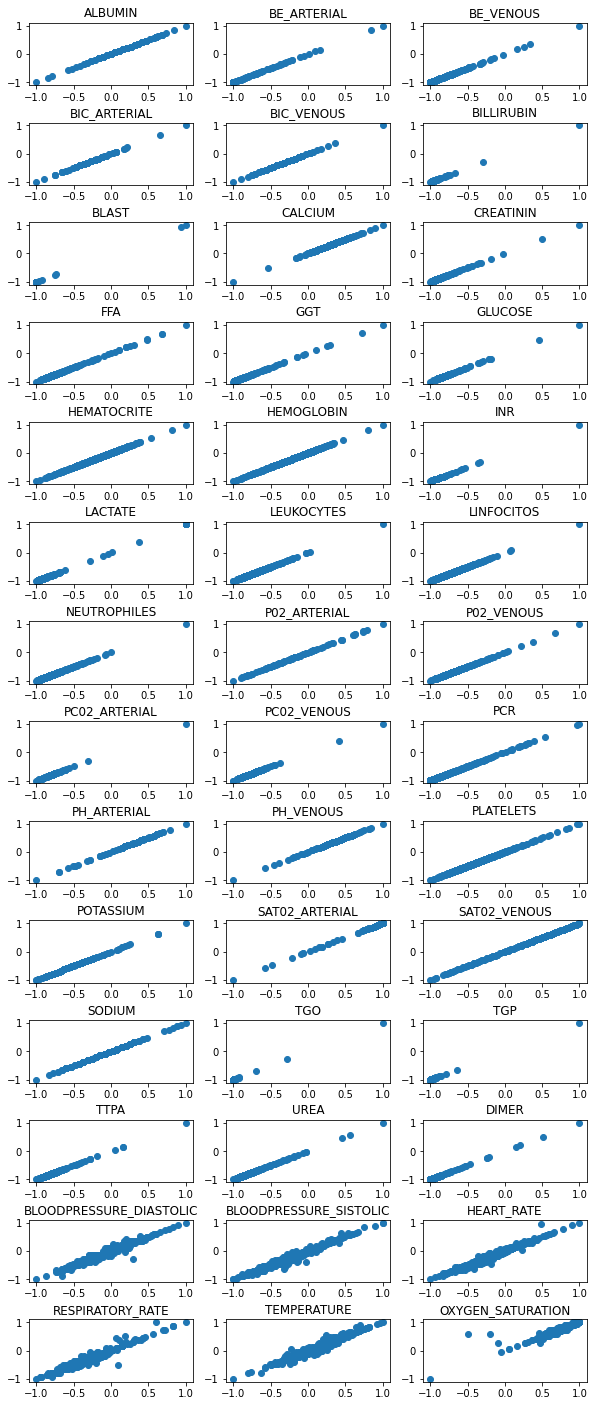

In [ ]:
fig, axs = plt.subplots(int(len(raw_columns) / 3), 3, figsize=(10, 25))
for i, col in enumerate(raw_columns):
    axs[i // 3, i % 3].scatter(x=df_mean[f"{col}_MEAN"], y=df_median[f"{col}_MEDIAN"])
    axs[i // 3, i % 3].set_title(col)
fig.subplots_adjust(hspace=0.6)
plt.show()

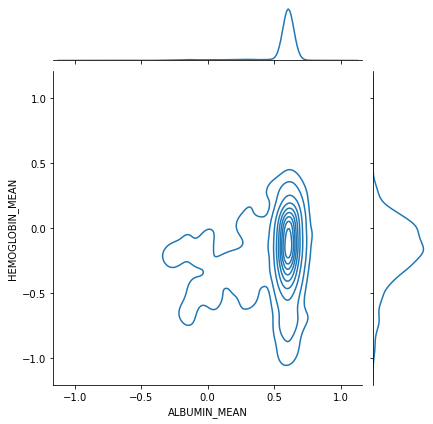

In [ ]:
sns.jointplot(data=df, x="ALBUMIN_MEAN", y="HEMOGLOBIN_MEAN",kind="kde")

In [ ]:
# Convert WINDOW column to categorical
df['WINDOW'] = df['WINDOW'].astype("category")

In [ ]:
#One hot encoding for Window feature.
window_dummy = pd.get_dummies(df['WINDOW'])
model_data = pd.concat([df, window_dummy], axis =1)
df = df.drop(columns=['WINDOW'])
df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0
1,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0
2,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0
3,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,-0.107143,0.736842,0
4,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,-1.000000,-0.717277,-0.317073,-0.170732,-0.982208,-1.0,0.244898,-0.934890,-0.782516,-0.960280,-0.862197,-0.064990,-0.158537,-0.957340,-0.897773,-0.848590,-0.686722,-0.913165,-0.170732,-0.857988,-0.779310,-0.730061,-0.906238,0.234043,0.424242,-0.479306,-0.333333,0.939394,-0.333333,-0.085714,-0.997387,-0.992378,-0.869210,-0.879518,-0.979571,0.012346,-0.292308,0.056604,-0.525424,0.535714,0.789474,0
1921,0,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,-1.000000,-0.717277,-0.317073,-0.170732,-0.982208,-1.0,0.244898,-0.934890,-0.782516,-0.960280,-0.862197,-0.064990,-0.158537,-0.957340,-0.897773,-0.848590,-0.686722,-0.913165,-0.170732,-0.857988,-0.779310,-0.730061,

In [ ]:
#Scaling the data using MinMaxScaler.(the dataset is initially scaled using MinMaxScaler when it is given.)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)
scaled_df=pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled_df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
0,1.0,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.802632,0.000000,0.000000,0.341463,0.341463,0.030525,0.0,0.591837,0.065817,0.128998,0.027453,0.054004,0.545073,0.554878,0.033877,1.000000,0.082078,0.042531,0.065626,0.414634,0.147929,0.110345,0.122699,0.062382,0.617021,0.681818,0.229640,0.240741,0.969697,0.672840,0.485714,0.001400,0.004573,0.087193,0.081928,0.002544,0.543210,0.384615,0.358491,0.20339,0.357143,0.868421,0.0
1,1.0,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.802632,0.000000,0.000000,0.341463,0.341463,0.030525,0.0,0.591837,0.065817,0.128998,0.027453,0.054004,0.545073,0.554878,0.033877,1.000000,0.082078,0.042531,0.065626,0.414634,0.147929,0.110345,0.122699,0.062382,0.617021,0.681818,0.229640,0.240741,0.969697,0.672840,0.485714,0.001400,0.004573,0.087193,0.081928,0.002544,0.666667,0.384615,0.433962,0.20339,0.767857,0.789474,0.0
2,1.0,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.802632,0.000000,0.000000,0.341463,0.341463,0.030525,0.0,0.591837,0.065817,0.128998,0.027453,0.054004,0.545073,0.554878,0.033877,1.000000,0.082078,0.042531,0.065626,0.414634,0.147929,0.110345,0.122699,0.062382,0.617021,0.681818,0.229640,0.240741,0.969697,0.672840,0.485714,0.001400,0.004573,0.087193,0.081928,0.002544,0.666667,0.384615,0.433962,0.20339,0.767857,0.789474,0.0
3,1.0,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.802632,0.000000,0.000000,0.341463,0.341463,0.030525,0.0,0.591837,0.065817,0.128998,0.027453,0.054004,0.545073,0.554878,0.033877,1.000000,0.082078,0.042531,0.065626,0.414634,0.147929,0.110345,0.122699,0.062382,0.617021,0.681818,0.229640,0.240741,0.969697,0.672840,0.485714,0.001400,0.004573,0.087193,0.081928,0.002544,0.666667,0.384615,0.433962,0.20339,0.446429,0.868421,0.0
4,1.0,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.500000,0.064171,0.068063,0.341463,0.292683,0.010466,0.0,0.663265,0.036801,0.070362,0.165304,0.054004,0.339623,0.323171,0.010038,0.018489,0.118579,0.178423,0.065626,0.317073,0.384615,0.062069,0.092025,0.000000,0.787234,0.696970,0.264352,0.166667,0.924242,0.962963,0.571429,0.000467,0.008003,0.076684,0.081928,0.001619,0.378489,0.330731,0.393485,0.34107,0.516890,0.832966,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(scaled_df.drop(['ICU'],axis=1),scaled_df['ICU'],test_size=0.33, random_state=21)

In [ ]:
#CART model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred_cart=clf.predict(X_test)
print('train accuracy:',accuracy_score(y_train,clf.predict(X_train)))

train accuracy: 0.978277734678045


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cart))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cart)

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cart)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_neigh=neigh.predict(X_test)
print('train accuracy:',accuracy_score(y_train,neigh.predict(X_train)))

train accuracy: 0.9038013964313422


In [ ]:
print(classification_report(y_test, y_pred_cart))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       464
         1.0       0.70      0.61      0.65       172

    accuracy                           0.82       636
   macro avg       0.78      0.76      0.77       636
weighted avg       0.82      0.82      0.82       636



In [ ]:
confusion_matrix(y_test, y_pred_neigh)

array([[425,  39],
       [ 82,  90]])

In [ ]:
accuracy_score(y_test, y_pred_neigh)

0.7974025974025974

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg = reg.fit(X_train,y_train)
y_pred_reg=reg.predict(X_test)

In [ ]:
print('train accuracy:',accuracy_score(y_train,reg.predict(X_train)))

train accuracy: 0.8370830100853375


In [ ]:
confusion_matrix(y_test, y_pred_reg)

array([[430,  34],
       [ 78,  94]])

In [ ]:
print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.88       464
         1.0       0.73      0.55      0.63       172

    accuracy                           0.82       636
   macro avg       0.79      0.74      0.76       636
weighted avg       0.82      0.82      0.81       636



In [ ]:
accuracy_score(y_test, y_pred_reg)

0.8238993710691824

In [ ]:
from sklearn.svm import LinearSVC
svc_linear=LinearSVC(random_state=7, tol=1e-5)
svc_linear.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=7, tol=1e-05,
          verbose=0)

In [ ]:
print('train accuracy: ',svc_linear.score(X_train,y_train))

train accuracy:  0.8435064935064935


In [ ]:
y_pred=svc_linear.predict(X_test)
print('accuracy: ',accuracy_score(y_test, y_pred))

accuracy:  0.8181818181818182


In [ ]:
from sklearn.svm import SVC
svc_rbf=SVC()
svc_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('train accuracy using rbf kernel: ',svc_rbf.score(X_train,y_train))

train accuracy using rbf kernel:  0.7974025974025974


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=100,n_estimators=300,criterion='entropy',oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train accuracy:',accuracy_score(y_train,model.predict(X_train)))
print('test accuracy:',accuracy_score(y_test, y_pred))

train accuracy: 0.978277734678045
test accuracy: 0.8757861635220126


In [ ]:
confusion_matrix(y_test,y_pred)

array([[446,  18],
       [ 61, 111]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       464
         1.0       0.86      0.65      0.74       172

    accuracy                           0.88       636
   macro avg       0.87      0.80      0.83       636
weighted avg       0.87      0.88      0.87       636



In [ ]:
X_train.shape

(1289, 53)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten

In [ ]:
model = Sequential()
model.add(Dense(48,activation='relu', input_shape=(53,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=400,verbose=1)

Epoch 1/400
41/41 [==============================] - 1s 1ms/step - loss: 0.5603 - accuracy: 0.7383
Epoch 2/400
41/41 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7381
Epoch 3/400
41/41 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7945
Epoch 4/400
41/41 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7919
Epoch 5/400
41/41 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8109
Epoch 6/400
41/41 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8157
Epoch 7/400
41/41 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8100
Epoch 8/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8424
Epoch 9/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8287
Epoch 10/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8488
Epoch 11/

In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print()
print("%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))
predictions = model.predict(X_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.8412 - accuracy: 0.8412

accuracy: 84.12%


In [ ]:
y_pred_nn=[1 if i>0.5 else 0 for i in predictions]
y_pred_nn

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [ ]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       464
         1.0       0.76      0.60      0.67       172

    accuracy                           0.84       636
   macro avg       0.81      0.77      0.78       636
weighted avg       0.84      0.84      0.84       636



In [ ]:
confusion_matrix(y_test,y_pred_nn)

array([[431,  33],
       [ 68, 104]])

In [ ]:
metrics=model.evaluate(X_train,y_train,verbose=1)
print()
print("%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))
predictions = model.predict(X_train)

41/41 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9713

accuracy: 97.13%


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =20)
pca.fit(scaled_df.drop(['ICU'],axis=1))
x_reduced = pca.transform(scaled_df.drop(['ICU'],axis=1))

In [ ]:
x_reduced.shape

(1925, 20)

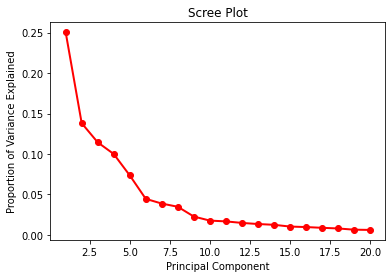

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
  print ("Cumulative Prop. Variance Explained: ",np.cumsum(pca.explained_variance_ratio_))
  #we can see that the cumulative proportion of varaiance explained for the first 20 components adds upto 95%

Cumulative Prop. Variance Explained:  [0.2504468  0.38856508 0.50299471 0.60301186 0.67661786 0.72121526
 0.75999313 0.7948088  0.81754626 0.83527842 0.85203199 0.86690241
 0.88040084 0.89293725 0.90330748 0.91304794 0.92186974 0.92989629
 0.93640303 0.94261887]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(x_reduced,scaled_df['ICU'],test_size=0.33, random_state=21)

In [ ]:
from sklearn.svm import LinearSVC
svc_linear=LinearSVC(random_state=7, tol=1e-5)
svc_linear.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=7, tol=1e-05,
          verbose=0)

In [ ]:
print('train accuracy: ',svc_linear.score(X_train,y_train))

train accuracy:  0.813033359193173


In [ ]:
from sklearn.svm import SVC
svc_rbf=SVC(gamma='auto',probability=True)
svc_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=svc_rbf.predict(X_test)
print('test accuracy: ',accuracy_score(y_test, y_pred))

test accuracy:  0.8317610062893082


In [ ]:
print('train accuracy using rbf kernel: ',svc_rbf.score(X_train,y_train))

train accuracy using rbf kernel:  0.804499612102405


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=100,n_estimators=300,criterion='entropy',oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('train accuracy:',accuracy_score(y_train,model.predict(X_train)))
print('test accuracy:',accuracy_score(y_test, y_pred))

train accuracy: 0.978277734678045
test accuracy: 0.8364779874213837


In [ ]:
model1 = Sequential()
model1.add(Dense(48,activation='relu', input_shape=(20,)))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model1.fit(X_train,y_train,batch_size=32,epochs=400,verbose=1)

Epoch 1/400
41/41 [==============================] - 1s 2ms/step - loss: 0.6781 - accuracy: 0.5951
Epoch 2/400
41/41 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7347
Epoch 3/400
41/41 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7669
Epoch 4/400
41/41 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8026
Epoch 5/400
41/41 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7941
Epoch 6/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8284
Epoch 7/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8269
Epoch 8/400
41/41 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8327
Epoch 9/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8371
Epoch 10/400
41/41 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8392
Epoch 11/

In [ ]:
metrics=model1.evaluate(X_train,y_train,verbose=1)
print()
print("%s: %.2f%%" % (model1.metrics_names[1], metrics[1]*100))
predictions = model1.predict(X_train)

41/41 [==============================] - 0s 966us/step - loss: 0.0494 - accuracy: 0.9760

accuracy: 97.60%


In [ ]:
metrics=model1.evaluate(X_test,y_test,verbose=1)
print()
print("%s: %.2f%%" % (model1.metrics_names[1], metrics[1]*100))
predictions = model1.predict(X_test)

20/20 [==============================] - 0s 1ms/step - loss: 1.0720 - accuracy: 0.8396

accuracy: 83.96%


In [ ]:
#sigmoid kernel
svc_sigmoid=SVC(kernel='sigmoid',gamma='auto',probability=True)
svc_sigmoid.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('train accuracy using sigmoid kernel: ',svc_sigmoid.score(X_train,y_train))

train accuracy using sigmoid kernel:  0.7882079131109387


In [ ]:
y_pred=svc_sigmoid.predict(X_test)
print('test accuracy: ',accuracy_score(y_test, y_pred))

test accuracy:  0.7971698113207547


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       464
         1.0       0.77      0.35      0.49       172

    accuracy                           0.80       636
   macro avg       0.79      0.66      0.68       636
weighted avg       0.79      0.80      0.77       636



In [ ]:
#poly kernel
svc_poly=SVC(kernel='poly',gamma='auto',probability=True)
svc_poly.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('train accuracy using poly kernel: ',svc_poly.score(X_train,y_train))

train accuracy using poly kernel:  0.7339022498060512


In [ ]:
y_pred=svc_poly.predict(X_test)
print('test accuracy: ',accuracy_score(y_test, y_pred))

test accuracy:  0.7295597484276729


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       464
         1.0       0.00      0.00      0.00       172

    accuracy                           0.73       636
   macro avg       0.36      0.50      0.42       636
weighted avg       0.53      0.73      0.62       636



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svc_non_lin=SVC(kernel='linear',gamma='auto',probability=True)
svc_non_lin.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('train accuracy using linear kernel: ',svc_non_lin.score(X_train,y_train))

train accuracy using linear kernel:  0.8138091543832429


In [ ]:
y_pred=svc_non_lin.predict(X_test)
print('test accuracy: ',accuracy_score(y_test, y_pred))

test accuracy:  0.8081761006289309


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.87       464
         1.0       0.70      0.51      0.59       172

    accuracy                           0.81       636
   macro avg       0.77      0.71      0.73       636
weighted avg       0.80      0.81      0.80       636



In [ ]:
from sklearn.svm import SVC
svc_rbf=SVC(gamma='auto',probability=True)
svc_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('train accuracy using rbf kernel: ',svc_rbf.score(X_train,y_train))

train accuracy using rbf kernel:  0.804499612102405


In [ ]:
y_pred=svc_rbf.predict(X_test)
print('test accuracy: ',accuracy_score(y_test, y_pred))

test accuracy:  0.8018867924528302


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       464
         1.0       0.73      0.42      0.53       172

    accuracy                           0.80       636
   macro avg       0.77      0.68      0.70       636
weighted avg       0.79      0.80      0.78       636



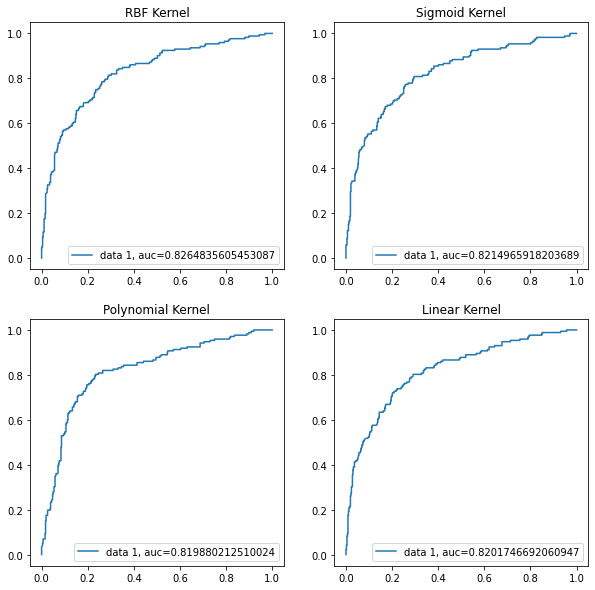

In [ ]:
from sklearn import metrics
models=[svc_rbf,svc_sigmoid,svc_poly,svc_non_lin]
fig,axis=plt.subplots(2,2,figsize=(10,10))
j=0
k=0
for i in models:
  y_pred_proba = i.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label=1)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  axis[k][j].plot(fpr,tpr,label="data 1, auc="+str(auc))
  axis[k][j].legend(loc=4)
  if j==0 and k==0:
    axis[0][j].set_title('RBF Kernel')
  elif j==1 and k==0:
    axis[0][j].set_title('Sigmoid Kernel')
  elif j==0 and k==1:
    axis[1][j].set_title('Polynomial Kernel')
  else:
    axis[1][j].set_title('Linear Kernel')
  j+=1
  if j%2==0:
    j=0
    k=1
  
plt.show()